# Data Exploration

In [3]:
import pandas as pd
import numpy as np
import sys

In [4]:
# to be able to auto reload external code:

%load_ext autoreload
%autoreload 2

# for Linux
sys.path.append('../src')
sys.path.append('../data')

# for Windows
sys.path.append('..\\src\\')
sys.path.append('..\\data\\')

## Read pre-processed dataframes

Note: Parsing of the train, valid and test files is done via parse_data notebook

I have incuded files containing the trian, valid, test data after parcing, this will save time if you are running on a weak CPU. Separating into 2 notebooks one of parsing and one for exploration, makes the current notebook lightweight.

The parsing stage have created 2 types of dataframes, one with line per token and another with line per sentence. We'll dive deeper into them in this notebook

In [5]:
# sentences:
train_features = pd.read_csv('..\\data\\train_features.csv')
valid_features = pd.read_csv('..\\data\\valid_features.csv')
test_features = pd.read_csv('..\\data\\test_features.csv')

# tokens
train_freq = pd.read_csv('..\\data\\train_freq.csv')
valid_freq = pd.read_csv('..\\data\\valid_freq.csv')
test_freq = pd.read_csv('..\\data\\test_freq.csv')

## Check the number of samples and tockens in each set: train, valid, test

In [6]:
print('number of sentences in train, valid and test sets respectively: ', len(train_features), len(valid_features), len(test_features))

number of sentences in train, valid and test sets respectively:  14040 3249 3452


In [7]:
print('number of tokens in train, valid and test sets respectively: : ', len(train_freq), len(valid_freq), len(test_freq))

number of tokens in train, valid and test sets respectively: :  204566 51577 46665


## Check relative sizes of training and test+validation sets

Sentences:

In [8]:
# (number of sentences in test + valid sets) / ( number of sentences in train + test + valid sets)
print("Percent of sentences left for validation and testing is", 
      100*(len(valid_features) + len(test_features))/(len(train_features) + len(valid_features) + len(test_features)), "%")

Percent of sentences left for validation and testing is 32.30798900728026 %


In [9]:
print("The number of sentences in the validation set (", len(valid_features), ") is almost equals to one in the test set ( ", 
      len(test_features), " )")

The number of sentences in the validation set ( 3249 ) is almost equals to one in the test set (  3452  )


Tokens:

In [10]:
# (number of tokens in test + valid sets) / ( number of tokens in train + test + valid sets)
print("Percent of tokens left for validation and testing is", 
      100*(len(valid_freq) + len(test_freq))/(len(train_freq) + len(valid_freq) + len(test_freq)), "%")

Percent of tokens left for validation and testing is 32.44366066946712 %


In [11]:
print("The number of tokens in the validation set (", len(valid_freq), "), one in the test set ( ", 
      len(test_freq), " )")

The number of tokens in the validation set ( 51577 ), one in the test set (  46665  )


## Take a quick look at the resulting train data

sample will every time give a random sample of the requested size so is convenient for spotting data cleaning problems

In [12]:
# set width to see more of the long lists of features and lables in the table
pd.set_option('max_colwidth', 300)

In [13]:
# data format is [listof tokens] [list of corresponding lables] grouped in sentences, see sample below:
train_features.sample(10)

,features,lables
4527,"['TENNIS', '-', 'RESULTS', 'AT', 'HAMLET', 'CUP', '.']","['O', 'O', 'O', 'O', 'B-MISC', 'I-MISC', 'O']"
4271,"['Iran', 'has', 'an', 'estimated', 'one', 'million', 'drug', 'addicts', 'and', 'is', 'a', 'key', 'transit', 'route', 'for', 'drugs', ',', 'mostly', 'opium', ',', 'smuggled', 'to', 'Europe', 'through', 'Afghanistan', 'and', 'Pakistan', '--', 'the', 'so', 'called', '""', 'Golden', 'Crescent', '.', ...","['B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'B-LOC', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'O', 'O']"
5020,"['SOCCER', '-', 'SCOTTISH', 'PREMIER', 'DIVISION', 'RESULT', '/', 'STANDINGS', '.']","['O', 'O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'O']"
9337,"['Portland', 'sources', 'said', 'feed', 'mixer', 'demand', 'was', 'keeping', 'pace', 'with', 'millfeed', 'production', 'and', 'driving', 'prices', 'higher', '.']","['B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']"
100,"['Rabinovich', 'is', 'winding', 'up', 'his', 'term', 'as', 'ambassador', '.']","['B-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']"
4789,"['9.', 'Footwork', '1']","['O', 'O', 'O']"
13884,"['-', 'Coopers', 'and', 'Lybrand', 'emigrates', 'to', 'Basque', 'Country', 'for', 'fiscal', 'reasons']","['O', 'B-ORG', 'I-ORG', 'I-ORG', 'O', 'O', 'B-LOC', 'I-LOC', 'O', 'O', 'O']"
11813,"['Chiate', 'said', 'he', 'has', 'advised', 'Names', 'that', '""', 'they', 'must', 'make', ',', 'individually', ',', 'a', 'risk', 'benefit', 'analysis', '.', '""']","['B-PER', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']"
1376,"['It', 'sponsored', 'last', 'week', ""'s"", 'U.N.', 'Security', 'Council', 'resolution', 'threatening', 'a', 'ban', 'on', 'Sudanese', 'flights', 'abroad', 'if', 'Khartoum', 'does', 'not', 'hand', 'over', 'three', 'men', 'accused', 'in', 'the', 'Addis', 'Ababa', 'incident', '.']","['O', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'I-LOC', 'O', 'O']"
10559,"['SOCCER', '-', 'BARCELONA', 'WIN', 'SPANISH', 'SUPER', 'CUP', '.']","['O', 'O', 'B-ORG', 'O', 'B-MISC', 'B-MISC', 'I-MISC', 'O']"


## Clean the data

In [14]:
# I have made several cleanup iterations, but added then to the parsing utility
# example of data to clean that I have seen while exploring training data were the fillowing lines:
# [-DOCSTART-]	[-X-]

## Utilities for data exploration

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_lables_frequency(vc, tag):
    trlf = pd.DataFrame(vc).reset_index()
    trlf.columns = ['lable', 'count']
    trlf_sub = trlf[trlf.lable != 'O']
    my_plot = trlf_sub[['lable', 'count']].plot(kind='bar',legend=None,title="Lables frequencies " + tag)
    my_plot.set_xlabel("Lables")
    my_plot.set_ylabel("Count")

## Explore lables frequencies in train set

In [16]:
train_freq.sample(10)

,token,pos,chunk,lable
715,was,VBD,B-VP,O
18115,mining,NN,B-NP,O
129312,returns,VBZ,B-VP,O
100357,Singapore,NNP,I-NP,B-LOC
19954,an,DT,B-NP,O
14825,match,NN,I-NP,O
43529,$,$,B-NP,O
196324,several,JJ,B-NP,O
72791,little,JJ,B-NP,O
33375,third,JJ,B-NP,O


Training:

In [17]:
print("frequencies of lables: ")
print(train_freq.lable.value_counts())

frequencies of lables: 
O         170523
B-LOC       7140
B-PER       6600
B-ORG       6321
I-PER       4528
I-ORG       3704
B-MISC      3438
I-LOC       1157
I-MISC      1155
Name: lable, dtype: int64


Let's plot the lables bar graph, I'll o mit lable "o" in this graph to be able to view the relative values of less frequent lables.

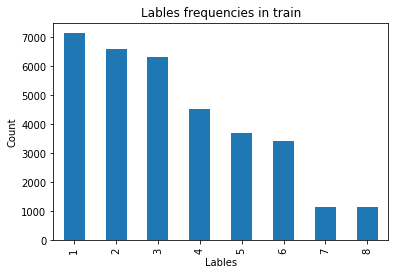

In [18]:
plot_lables_frequency(train_freq.lable.value_counts(), "in train")

validation data:

In [19]:
print("frequencies of lables: ")
print(valid_freq.lable.value_counts())

frequencies of lables: 
O         42974
B-PER      1842
B-LOC      1837
B-ORG      1341
I-PER      1307
B-MISC      922
I-ORG       751
I-MISC      346
I-LOC       257
Name: lable, dtype: int64


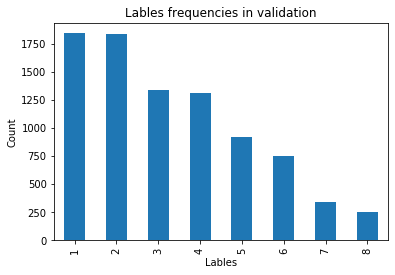

In [20]:
plot_lables_frequency(valid_freq.lable.value_counts(), "in validation")

test data:

In [21]:
print("frequencies of lables: ")
print(test_freq.lable.value_counts())

frequencies of lables: 
O         38553
B-LOC      1668
B-ORG      1661
B-PER      1617
I-PER      1156
I-ORG       835
B-MISC      702
I-LOC       257
I-MISC      216
Name: lable, dtype: int64


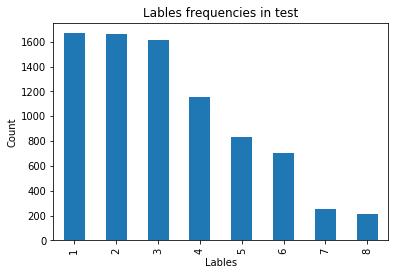

In [22]:
plot_lables_frequency(test_freq.lable.value_counts(), "in test")

### Conclusions from the graphs above

- B-LOC, B-PER, B-ORG are most frequent in all 3 sets: train, valid, test
- I have noticed some imballance: in validation set relative number of B-ORG is smaller then in others. It is 26.7% from the leading 3 lables in valid set as opposed to 31% in train.
- I-Loc and I-MISC are the less frequent in all 3 sets

## Frequencies of tockens

In [23]:
print("frequencies of tokens: ")
print(train_freq.token.value_counts())

frequencies of tokens: 
.             7374
,             7290
the           7243
of            3751
in            3398
              ... 
polishing        1
hard-won         1
Wilhelmina       1
McFarlane        1
jewel            1
Name: token, Length: 23623, dtype: int64


In [24]:
print("frequencies of tokens: ")
print(test_freq.token.value_counts())

frequencies of tokens: 
,              1637
.              1626
the            1545
to              795
of              783
               ... 
46.7              1
impasse           1
accomplices       1
KCBT              1
KOREA             1
Name: token, Length: 9489, dtype: int64


In [25]:
print("frequencies of tokens: ")
print(test_freq.token.value_counts())

frequencies of tokens: 
,              1637
.              1626
the            1545
to              795
of              783
               ... 
46.7              1
impasse           1
accomplices       1
KCBT              1
KOREA             1
Name: token, Length: 9489, dtype: int64


- We see that tockenizer has slited punctuation from words, so we see the expected picture of punctuation being the most frequent token
- Second in frequency are stopwords, also as expected

### Look at possible tokenization problems

In [26]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tasya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
import string

def clean_stopwords_and_punct(trlf):
    stlist = ['The', '-DOCSTART-', 'said']
    excluded = stlist + list(string.punctuation) + list(stopwords.words('english'))
    trlf_sub = trlf[~trlf.token.isin(excluded) ] #& ~trlf.token.isnumeric()
    print(trlf_sub.token.value_counts().head())

In [28]:
clean_stopwords_and_punct(test_freq)

's            330
4             201
1996-12-06    165
2             161
6             160
Name: token, dtype: int64


Conclusions about tokenization:
- "'s" is separated from words by the tokeniser
- in dates "-" remain with the date

## Let's take a look at frequency of tokens that were labled as named entities

In [29]:
def explore_ne(trlf):
    trlf_sub = trlf[trlf.lable != 'O']
    print(trlf_sub.sample(10))
    print("Frequencies:")
    print(trlf_sub.token.value_counts().head(10))

In [30]:
explore_ne(train_freq)

             token  pos chunk   lable
9825      NATIONAL  NNP  B-NP  B-MISC
21468          ADV  NNP  B-NP   B-ORG
5366     Mickelson   NN  B-NP   B-PER
38984   Goncharova  NNP  B-NP   B-PER
116291        Haas  NNP  I-NP   I-PER
52172     Somerset  NNP  B-NP   B-ORG
22824   Bangladesh  NNP  I-NP   B-LOC
21519      Cologne  NNP  B-NP   B-LOC
198856     Kekkila  NNP  B-NP   B-ORG
142102      Smoltz  NNP  I-NP   I-PER
Frequencies:
U.S.         377
New          152
Germany      143
Australia    136
of           134
Britain      133
France       127
England      127
South        121
Spain        111
Name: token, dtype: int64


In [31]:
explore_ne(valid_freq)

          token  pos chunk   lable
14396       New  NNP  B-NP   B-LOC
48144     Iraqi   JJ  I-NP  B-MISC
36628   Dodgers  NNP  I-NP   I-ORG
6156    Germany  NNP  B-NP   B-LOC
8937   Controls  NNP  I-NP   I-ORG
10043    Briton  NNP  I-NP  B-MISC
40265    Ingham  NNP  I-NP   I-PER
35586      King  NNP  B-NP   B-PER
779      London  NNP  B-NP   B-LOC
2875    ANGELES  NNP  I-NP   I-ORG
Frequencies:
U.S.       130
Germany     47
Russia      45
France      43
of          40
Iraqi       39
China       32
South       32
England     32
World       31
Name: token, dtype: int64


In [32]:
explore_ne(test_freq)

            token  pos chunk   lable
34076         New  NNP  B-NP   B-LOC
38913         Cup  NNP  I-NP  I-MISC
15951     Zairean   JJ  I-NP  B-MISC
34703          of   IN  B-PP  I-MISC
7567   Secretario  NNP  I-NP   I-PER
4502       Indies  NNP  I-NP   I-LOC
4665      Santoso  NNP  I-NP   I-PER
38240     Austria  NNP  B-NP   B-LOC
27734      Polish   JJ  I-NP  B-MISC
9250      Angloma  NNP  I-NP   I-PER
Frequencies:
Cup          57
World        55
U.S.         51
Germany      50
Australia    45
Japan        42
Italy        42
United       42
France       40
NEW          37
Name: token, dtype: int64


Observations:
- "of" is frequently labled as named entity. Check whether mislabled or part of longer entity.
- The same about "New", "World", "Cup", "Network", "Action" - all of them start from a capital letter, may be a beginning of a legitimage nemed entity and may be mislabling, for insatance mislabling of words that start from a capital letter at the beginnig of a sentence
- In real life project I would have made sure that there is no mislabling issue here.

### Let's take a closer look at one of the questions/observations above

- question: "New" - is it mislabling or part of legit entities? 
-- checked row data, nost of the "New" tokens are part of I/B-LOC, like New Zeland, New York, New England.
-- let's check below where "New" that are tagged as names entities, but not I/B-LOC, come from

In [65]:
def explore_non_location_ne(trlf):
    excluded = ['O', 'B-LOC', 'I-LOC']
    trlf_sub = trlf[~trlf.lable.isin(excluded) ]
    trlf_sub1 = trlf_sub [trlf_sub.token == 'New']
    print(trlf_sub1.head(12))
    print("Frequencies:")
    print(trlf_sub1.lable.value_counts().head(10))

At the level of individual entries

In [66]:
explore_non_location_ne(train_freq)

      token  pos chunk  lable
4045    New  NNP  I-NP  I-ORG
4109    New  NNP  I-NP  I-ORG
9635    New  NNP  I-NP  B-ORG
9663    New  NNP  I-NP  B-ORG
10012   New  NNP  I-NP  B-ORG
25138   New  NNP  B-NP  I-ORG
25229   New  NNP  I-NP  I-ORG
43675   New  NNP  I-NP  B-ORG
43731   New  NNP  I-NP  I-ORG
47253   New  NNP  B-NP  B-ORG
54391   New  NNP  I-NP  B-ORG
71242   New  NNP  I-NP  B-ORG
Frequencies:
B-ORG     39
I-ORG     10
B-MISC     8
Name: lable, dtype: int64


there is a single word per line, so let's check sebsequent lines

Example of organization is correctly labled

In [67]:
train_freq.loc[4045] #org

token      New
pos        NNP
chunk     I-NP
lable    I-ORG
Name: 4045, dtype: object

In [68]:
train_freq.loc[4046]

token    England
pos          NNP
chunk       I-NP
lable      I-ORG
Name: 4046, dtype: object

In [69]:
train_freq.loc[4047]

token    Telecommunciations
pos                     NNP
chunk                  I-NP
lable                 I-ORG
Name: 4047, dtype: object

Example of MISC, looks well

In [59]:
train_freq.loc[76099] #misc

token       New
pos         NNP
chunk      I-NP
lable    B-MISC
Name: 76099, dtype: object

In [60]:
train_freq.loc[76100] #next line

token    Zealander
pos            NNP
chunk         I-NP
lable       I-MISC
Name: 76100, dtype: object

In a real project I would proceed to check bi-grams and tri-grams starting with "New".

## Additional questions to answer:


- What are the pitfaults of the annotations of dataset at hand? Ideas to check:
-- Tokenization, see above
- Do frequenfies (of tockens, lables) correlate with correspondig frequencies in samples from our expected traffic? - need traffic sample to answer